In [105]:
#name waqar khan  reg no 2018507
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [106]:
def zero_pad(X, pad):
    """
    Arguments:
    X -- python numpy array of shape (n_H, n_W) representing a an image
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    """
    #your code goes here
    #check np.pad()
    X_pad = np.pad(X, ((pad,pad), (pad,pad)), 'constant', constant_values = (0,0))
    return X_pad

enter the value that you want to padding on image  8


x.shape = (12, 3)
x_pad.shape = (28, 19)
x[1,1] = 0.8654076293246785
x_pad[1,1] = 0.0


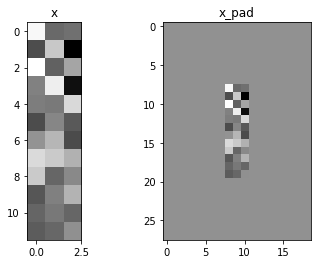

In [109]:
np.random.seed(1)
x = np.random.randn(12, 3)

#plt.imshow(x)
pad=int(input("enter the value that you want to padding on image "))
x_pad=zero_pad(x,pad)
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x,cmap='gray')
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad,cmap='gray')

In [111]:
def conv2D(inp, F, pad, stride):
    # Cross Correlation
    F = np.flipud(np.fliplr(F))
    (n_H,n_W) = inp.shape
    (f_H,f_W) = F.shape
    # Shape of Output Convolution
    xOutput = int(((n_H - f_H + 2 * pad) / stride) + 1)
    yOutput = int(((n_W - f_W + 2 * pad) / stride) + 1)
    Z = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if pad != 0:
        inpPad = np.zeros((n_H + pad * 2, n_W + pad * 2))
        inpPad[int(pad):int(-1 * pad), int(pad):int(-1 * pad)] = inp
        print(inpPad)
    else:
        inpPad = inp

    # Iterate through inp
    for y in range(n_W):
        # Exit Convolution
        if y > n_W - f_W:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % stride == 0:
            for x in range(n_H):
                # Go to next row once F is out of bounds
                if x > n_H - f_H:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % stride == 0:
                        Z[x, y] = (F * inpPad[x: x + f_H, y: y + f_W]).sum()
                except:
                    break
                    

    return Z

In [112]:
duck=cv2.imread("D:\downloads from chrom\duck.jpg")
grayduck=cv2.cvtColor(duck, cv2.COLOR_BGR2GRAY)
cv2.imshow("",grayduck)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [113]:
# convert duck to grayscale (Hint: see cv2.cvtColor)
grayduck=cv2.cvtColor(duck, cv2.COLOR_BGR2GRAY)
cv2.imshow("",grayduck)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [116]:
filter = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]],dtype="int")
pad=0
stride=1
data1=conv2D(grayduck,filter,pad,stride)
cv2.imshow("",data1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [117]:
# Initialize sobel vertical edge filter
filter1 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
# Use your Conv2D filter to get vertical edge filter and display them.
pad=0
stride=1
data1=conv2D(grayduck,filter1,pad,stride)
cv2.imshow("",data1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [118]:
# combine horizontal and vertical edges and display the final results
f=filter+filter1
pad=0
stride=1
data2=conv2D(grayduck,f, pad, stride)
cv2.imshow("",data2)
cv2.waitKey(0)
cv2.destroyAllWindows()


In this part you will make a filter bank for skin textures given in skins folder and then use those to classify 'unknown.jpg'. You will perform the following steps:

Read skin images and convert them to grayscale.
Resize the images to 64x64. (Hint: see cv2.resize).
Initialize any 6 filters. This will be your filter bank.
Create a 6D feature vector for each image using window size of 8. (Use your Conv2D function for this).
Display each feature vector as an image i.e. use plt.imshow.
Do the above steps for unknown.jpg and calculate it's feature vector.
Calculate and display the equilidean distance of unknown.jpg's feature with each of skin's feature vector.
Predict the class name of unknown.jpg based on the euclidean distances calculated in previous step.

In [119]:
import glob
n=0
#select the path
path = "D:\skins\*.*"
for bb,file in  enumerate(glob.glob(path)):
    image_read = cv2.imread(file)
    # conversion numpy array into grapscale image to show
    resized = cv2.resize(image_read , (64,64),interpolation = cv2.INTER_AREA)
    cv2.imshow("Resized image", resized)
    c = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('newfolder{}.jpg'.format(bb),c)
    cv2.imshow('Color image', c)
    # resize image
    n=n+1
    # wait for  second
    k = cv2.waitKey(10000)
    # destroy the window
    cv2.destroyAllWindows()

In [120]:
f0 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]],dtype="int")
f1 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]],dtype="int")
f2 = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]],dtype="int")
f3 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]],dtype="int")
f4 = np.array([[0, 0, -1], [0, 1, 0], [0, 0, 0]],dtype="int")
f5 = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 0]],dtype="int")
f=[f0,f1,f2,f3,f4,f5]

[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 176. 145. ... 115.  31.   0.]
 [  0. 123. 173. ... 112.  28.   0.]
 ...
 [  0.  94.  88. ...  71.  49.   0.]
 [  0.  34.  69. ...  19.  13.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 176. 145. ... 115.  31.   0.]
 [  0. 123. 173. ... 112.  28.   0.]
 ...
 [  0.  94.  88. ...  71.  49.   0.]
 [  0.  34.  69. ...  19.  13.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 176. 145. ... 115.  31.   0.]
 [  0. 123. 173. ... 112.  28.   0.]
 ...
 [  0.  94.  88. ...  71.  49.   0.]
 [  0.  34.  69. ...  19.  13.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 176. 145. ... 115.  31.   0.]
 [  0. 123. 173. ... 112.  28.   0.]
 ...
 [  0.  94.  88. ...  71.  49.   0.]
 [  0.  34.  69. ...  19.  13.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 176. 145. ... 115.  31.   0.]
 [  0. 123. 17

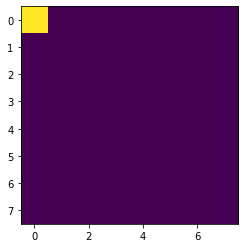

In [121]:
pad=1
stride=8
data2 = cv2.imread("newfolder0.jpg") 
data3=cv2.cvtColor(data2, cv2.COLOR_BGR2GRAY)
for i in f:
        data0=conv2D(data3,i, pad, stride)
        i=i+1
        plt.imshow(data0)
       

[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 162. 150. ... 145. 144.   0.]
 [  0. 125. 171. ... 144. 134.   0.]
 ...
 [  0. 142. 116. ... 102.  88.   0.]
 [  0. 146. 126. ... 109.  97.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 162. 150. ... 145. 144.   0.]
 [  0. 125. 171. ... 144. 134.   0.]
 ...
 [  0. 142. 116. ... 102.  88.   0.]
 [  0. 146. 126. ... 109.  97.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 162. 150. ... 145. 144.   0.]
 [  0. 125. 171. ... 144. 134.   0.]
 ...
 [  0. 142. 116. ... 102.  88.   0.]
 [  0. 146. 126. ... 109.  97.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 162. 150. ... 145. 144.   0.]
 [  0. 125. 171. ... 144. 134.   0.]
 ...
 [  0. 142. 116. ... 102.  88.   0.]
 [  0. 146. 126. ... 109.  97.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 162. 150. ... 145. 144.   0.]
 [  0. 125. 17

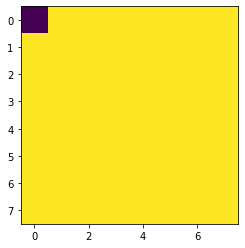

In [122]:
#for 2nd image
pad=1
stride=8
data2 = cv2.imread("newfolder1.jpg") 
data3=cv2.cvtColor(data2, cv2.COLOR_BGR2GRAY)
for i in f:
        data9=conv2D(data3,i, pad, stride)
        i=i+1
        plt.imshow(data9)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 140. 175. ... 130. 134.   0.]
 [  0. 177. 146. ... 153. 112.   0.]
 ...
 [  0.  21.  96. ...   4.  52.   0.]
 [  0.   7. 134. ...   4.  41.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 140. 175. ... 130. 134.   0.]
 [  0. 177. 146. ... 153. 112.   0.]
 ...
 [  0.  21.  96. ...   4.  52.   0.]
 [  0.   7. 134. ...   4.  41.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 140. 175. ... 130. 134.   0.]
 [  0. 177. 146. ... 153. 112.   0.]
 ...
 [  0.  21.  96. ...   4.  52.   0.]
 [  0.   7. 134. ...   4.  41.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 140. 175. ... 130. 134.   0.]
 [  0. 177. 146. ... 153. 112.   0.]
 ...
 [  0.  21.  96. ...   4.  52.   0.]
 [  0.   7. 134. ...   4.  41.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 140. 175. ... 130. 134.   0.]
 [  0. 177. 14

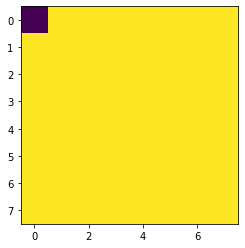

In [123]:
#for 3nd image
pad=1
stride=8
data2 = cv2.imread("newfolder2.jpg") 
data3=cv2.cvtColor(data2, cv2.COLOR_BGR2GRAY)
for i in f:
        data8=conv2D(data3,i, pad, stride)
        i=i+1
        plt.imshow(data8)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.  93. 200. ...  66. 109.   0.]
 [  0.  61. 187. ...  78.  52.   0.]
 ...
 [  0.  95.  20. ... 118.  27.   0.]
 [  0.  62.  41. ...  52.  23.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.  93. 200. ...  66. 109.   0.]
 [  0.  61. 187. ...  78.  52.   0.]
 ...
 [  0.  95.  20. ... 118.  27.   0.]
 [  0.  62.  41. ...  52.  23.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.  93. 200. ...  66. 109.   0.]
 [  0.  61. 187. ...  78.  52.   0.]
 ...
 [  0.  95.  20. ... 118.  27.   0.]
 [  0.  62.  41. ...  52.  23.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.  93. 200. ...  66. 109.   0.]
 [  0.  61. 187. ...  78.  52.   0.]
 ...
 [  0.  95.  20. ... 118.  27.   0.]
 [  0.  62.  41. ...  52.  23.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.  93. 200. ...  66. 109.   0.]
 [  0.  61. 18

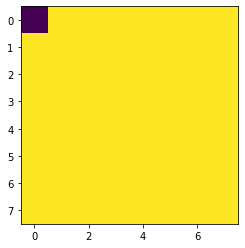

In [124]:
#for 4th image
pad=1
stride=8
data2 = cv2.imread("newfolder3.jpg") 
data3=cv2.cvtColor(data2, cv2.COLOR_BGR2GRAY)
for i in f:
        data7=conv2D(data3,i, pad, stride)
        i=i+1
        plt.imshow(data7)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 132. 128. ... 171.  47.   0.]
 [  0. 122. 125. ... 183.  50.   0.]
 ...
 [  0. 129. 148. ...  49. 108.   0.]
 [  0.  77. 141. ...  81. 148.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 132. 128. ... 171.  47.   0.]
 [  0. 122. 125. ... 183.  50.   0.]
 ...
 [  0. 129. 148. ...  49. 108.   0.]
 [  0.  77. 141. ...  81. 148.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 132. 128. ... 171.  47.   0.]
 [  0. 122. 125. ... 183.  50.   0.]
 ...
 [  0. 129. 148. ...  49. 108.   0.]
 [  0.  77. 141. ...  81. 148.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 132. 128. ... 171.  47.   0.]
 [  0. 122. 125. ... 183.  50.   0.]
 ...
 [  0. 129. 148. ...  49. 108.   0.]
 [  0.  77. 141. ...  81. 148.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 132. 128. ... 171.  47.   0.]
 [  0. 122. 12

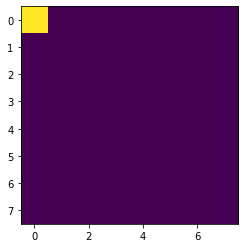

In [125]:
#for 5th image
pad=1
stride=8
data2 = cv2.imread("newfolder4.jpg") 
data3=cv2.cvtColor(data2, cv2.COLOR_BGR2GRAY)
for i in f:
        data10=conv2D(data3,i, pad, stride)
        i=i+1
        plt.imshow(data10)

In [126]:
#unkowm image
pad=1
stride=8
data2 = cv2.imread("newfolder4.jpg") 
resized = cv2.resize(data2, (64,64),interpolation = cv2.INTER_AREA)
data3=cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
print(data3.shape)
cv2.imwrite('newunkown.jpg',data3)
k = cv2.waitKey(10000)
# destroy the window
cv2.destroyAllWindows()


(64, 64)


In [127]:
da2 = cv2.imread("newunkown.jpg")
cv2.imshow("",da2)
k = cv2.waitKey(10000)
# destroy the window
cv2.destroyAllWindows()


[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 132. 128. ... 171.  47.   0.]
 [  0. 122. 125. ... 183.  50.   0.]
 ...
 [  0. 129. 148. ...  49. 108.   0.]
 [  0.  77. 141. ...  81. 148.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 132. 128. ... 171.  47.   0.]
 [  0. 122. 125. ... 183.  50.   0.]
 ...
 [  0. 129. 148. ...  49. 108.   0.]
 [  0.  77. 141. ...  81. 148.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 132. 128. ... 171.  47.   0.]
 [  0. 122. 125. ... 183.  50.   0.]
 ...
 [  0. 129. 148. ...  49. 108.   0.]
 [  0.  77. 141. ...  81. 148.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 132. 128. ... 171.  47.   0.]
 [  0. 122. 125. ... 183.  50.   0.]
 ...
 [  0. 129. 148. ...  49. 108.   0.]
 [  0.  77. 141. ...  81. 148.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 132. 128. ... 171.  47.   0.]
 [  0. 122. 12

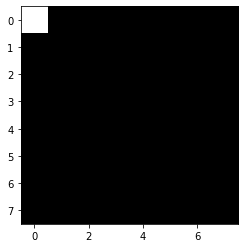

In [128]:
pad=1
stride=8
data2 = cv2.imread("newunkown.jpg") 
data3=cv2.cvtColor(data2, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(c , (64,64),interpolation = cv2.INTER_AREA)
for i in f:
        data6=conv2D(data3,i, pad, stride)
        i=i+1
        plt.imshow(data6,cmap="gray")

In [129]:
import math
def calculateDistance(i1, i2):
    
    return math.sqrt(np.sum((i1-i2)**2))

In [130]:
if calculateDistance(data6, data7)==0:
    print(" both are same image")
else:
    print("image are different ")

image are different 


In [131]:
if calculateDistance(data6, data8)==0:
  print(" both are same image")
else:
    print("image are different ")

image are different 


In [132]:
if calculateDistance(data6, data9)==0:
      print(" both are same image")
else:
    print("image are different ")

image are different 


In [133]:
if calculateDistance(data6, data0)==0:
      print(" both are same image")
else:
    print("image are different ")

image are different 


In [134]:
#unkown image and 5th image
if calculateDistance(data6, data10)==0:
      print(" both are same image")
else:
    print("image are different ")

 both are same image
